In [2]:
import numpy as np
import pandas as pd

#jupyter notebookの出力を小数点以下３桁に抑える
%precision 3
#DataFrameの出力を小数点以下３桁に抑える
pd.set_option('precision', 3)

df = pd.read_csv('./data/ch2_scores_em.csv', index_col='生徒番号')
#dfの最初の５桁を標示
df.head()


,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [4]:
#DataFrame=>A~Jの１０人分の点数を表示
scores_df = pd.DataFrame({'点数':scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒'))
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [5]:
#平均値
sum(scores) / len(scores)

55.0

In [6]:
#平均値その２
scores_df.mean()

点数    55.0
dtype: float64

In [7]:
#中央値(median)
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [8]:
#中央値の定義をコードへ落とす
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [9]:
np.median(scores)

56.5

In [10]:
#DataFrameやSeriesのmedianメソッド
scores_df.median()

点数    56.5
dtype: float64

In [11]:
#最頻値(mode)
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [12]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [13]:
#偏差(deviation)
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [14]:
#点数と偏差
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [15]:
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

In [16]:
#分散(=偏差の二乗)=>variance
np.mean(deviation ** 2)

86.0

In [17]:
#分散(NumPy)
np.var(scores)

86.0

In [18]:
#分散(DataFrame/Series)
scores_df.var()

点数    95.556
dtype: float64

In [19]:
#summary_dfに偏差二乗の列を追加
summary_df['偏差二乗'] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [20]:
summary_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

In [21]:
#分散の平方根
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [22]:
#分散の平方根(DataFrame/Series)
np.std(scores, ddof=0)

9.273618495495704

In [23]:
#範囲(range)
np.max(scores) - np.min(scores)

28

In [24]:
#四分位範囲(interquatile range)
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [25]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [26]:
#正規化(normalization),標準化(standardization)=>テストの点数を標準化
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [27]:
#標準化されたデータの平均と標準偏差
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [28]:
#各生徒の偏差値
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)

In [29]:
#各生徒の偏差値
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)

In [30]:
z


array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [31]:
# 点数と偏差値の関係=>Dataframe
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [32]:
#５０人の英語の点数のarray
english_scores = np.array(df['英語'])
#Seriesに変換して、describeを表示
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [33]:
#度数分布表を作成する
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [35]:
#0~10, 10~20, ...といった文字列のリストを作る
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
#freq_classをインデックスにしてfreqでDataFrameを作る
freq_dist_df = pd.DataFrame({'度数':freq}, index=pd.Index(freq_class, name='階級'))
freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [37]:
#階級値(階級を代表する値のことで、階級の中央値が使われる)
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [38]:
#相対度数は全データに対してその階級のデータがどのくらいの割合で占めているかを示す
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [39]:
#累積相対度数はその階級までの相対度数の和を示す。
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [41]:
#下級値と相対度数と累積相対度数を度数分布表に付け加える
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df = freq_dist_df[['階級値', '度数', '相対度数', '累積相対度数']]
freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [42]:
#最頻値再び
#量的データに対しても自然に最頻値を求めることができる
#度数分布表を使った最頻値は度数が最大である階級の階級値で定義される
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']

65

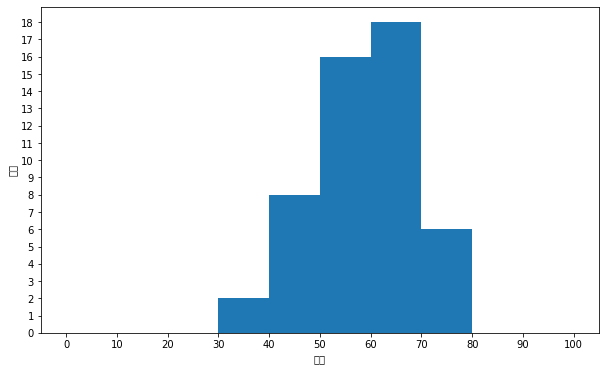

In [46]:
#ヒストグラム
#データ分布の形状を視覚化する=>matplotlib
import matplotlib.pyplot as plt
#グラフがnotebook上に表示されるようにする
%matplotlib inline

#キャンパスを作る
#figsizeで横、縦の大きさを指定
fig = plt.figure(figsize=(10, 6))
#キャンパス上にグラフを描画するための領域を作る
#引数は領域を１×１個作り、１つめの領域に描画することを意味する
ax = fig.add_subplot(111)

#階級数を１０にしてヒストグラムを描画
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
#X軸にラベルを付ける
ax.set_xlabel('点数')
#y軸にラベルを付ける
ax.set_ylabel('人数')
#X軸に0,10,20,...,100の目盛りをふる
ax.set_xticks(np.linspace(0, 100, 10+1))
#Y軸に0,1,2,...の目盛りをふる
ax.set_yticks(np.arange(0, freq.max()+1))
#グラフの表示
plt.show()

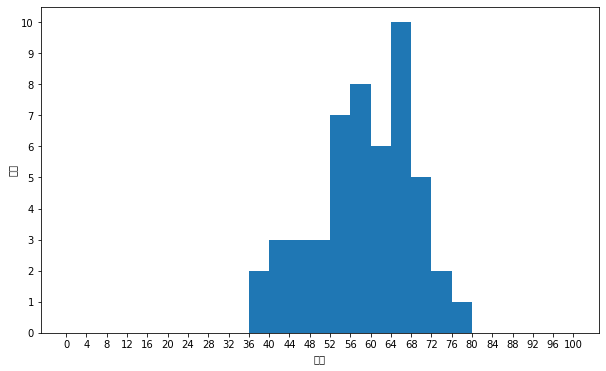

In [47]:
#階級数を25に細分化して、階級幅を４点にしたヒストグラム
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

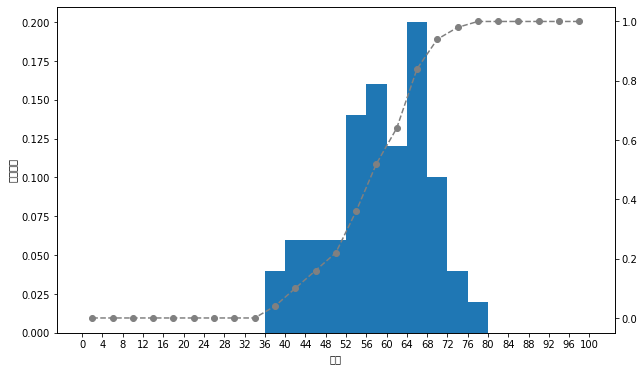

In [50]:
#相対度数のヒストグラムを累積相対度数の折れ線グラフと一緒に描画する
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
#Y軸のスケールが違うグラフをax1と同じ領域上に書けるようにする
ax2 = ax1.twinx()

#相対度数のヒストグラムにするためには、度数をデータの数で割る必要がある
#これはhistの引数weightを指定することで実現できる
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
#折れ線グラフの描画
#引数lsを'--'にすることでデータ線が点線に
#引数markerを'o'にすることでデータ点を丸に
#引数colorを'gray'にすることで灰色に
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
#折れ線グラフの罫線を消去
ax2.grid(visible=False)

ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_xlabel('累積相対度数')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()